In [1]:
import os
os.environ["LOGURU_LEVEL"] = "INFO"

from ect.tracking import (
    Tracker, 
    NaiveMatcher, 
    FFTTransformer, 
    FECTTransformer, 
    FECTCorrTransformer, 
    AbsoluteCartesianTracer as PositionTracer
)

from ect.helpers import SequenceImageGenerator, IdSequenceImageGenerator
from ect import Config

from typing import Callable

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import magma, gist_heat

In [2]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 13)
t = FFTTransformer()
# p = PositionTracer(transformer=t)
m = NaiveMatcher(    
    gt = (270, 200),
    template_shape=(150, 150),
    transformer=t, thresh=0.1)

tracker = Tracker(generator=g, matcher=m)#, callback=p.callback)

In [3]:
def center(inp: np.ndarray, invfunc: Callable[[np.ndarray], np.ndarray]) -> np.ndarray:
    X, Y = inp.shape
    inp = invfunc(inp)
    out = np.zeros_like(inp)
    out[:X//2, :Y//2] = inp[X//2:, Y//2:]
    out[X//2:, :Y//2] = inp[:X//2, Y//2:]
    out[X//2:, Y//2:] = inp[:X//2, :Y//2]
    out[:X//2, Y//2:] = inp[X//2:, :Y//2]
    return out

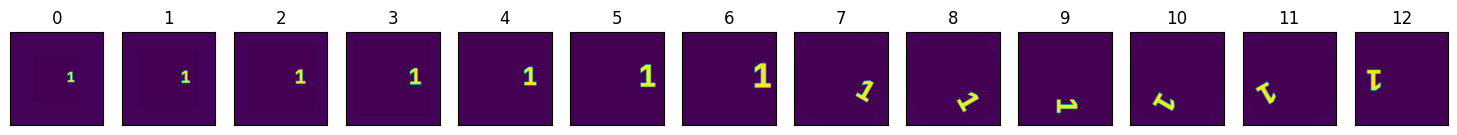

In [4]:

plt.figure(figsize=(20,5))

for idx, image in enumerate(g.images()):
    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

ic| dy: 399, dx: 82
ic| dy: 398, dx: 94
ic| dy: 398, dx: 106
ic| dy: 397, dx: 118
ic| dy: 396, dx: 143
ic| dy: 395, dx: 154
ic| dy: 53, dx: 117


newpos: x=282, y=199
newpos: x=294, y=198
newpos: x=306, y=198
newpos: x=318, y=197
newpos: x=343, y=196
newpos: x=354, y=195
newpos: x=317, y=253


ic| dy: 99, dx: 77
ic| dy: 119, dx: 19
ic| dy: 109, dx: 358
ic| dy: 71, dx: 311
ic| dy: 14, dx: 290


newpos: x=277, y=299
newpos: x=219, y=319
newpos: x=158, y=309
newpos: x=111, y=271
newpos: x=90, y=214


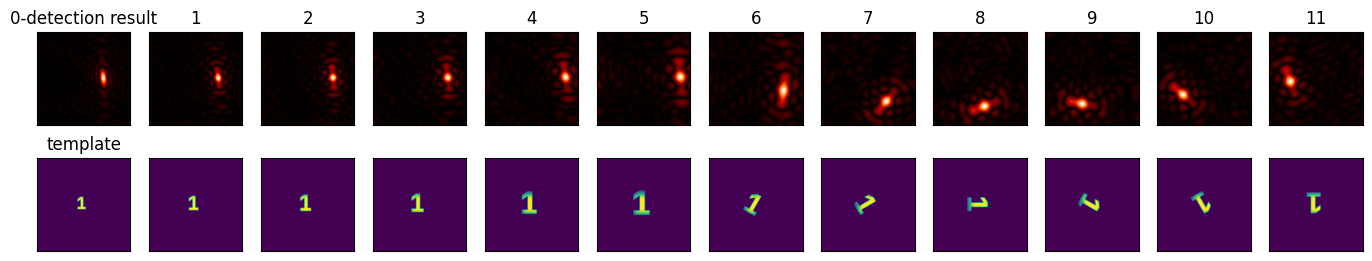

In [5]:
plt.figure(figsize=(20,3))

for idx, images in enumerate(tracker.track()):

    plt.subplot(2, 14, idx+1)
    plt.imshow(center(images[1], lambda x: np.abs(np.fft.ifft2(x))), cmap=gist_heat)
    plt.xticks([])
    plt.yticks([])
    if idx == 0:
        plt.title(f"{idx}-detection result")
    else:
        plt.title(str(idx))

    plt.subplot(2, 14, 15+idx)
    plt.imshow(images[2])
    plt.xticks([])
    plt.yticks([])
    if idx == 0:
        plt.title("template")


In [6]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 13)
# g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/bag/color/{id:08d}.jpg", 10)

t = FECTCorrTransformer(Config(offset_value_px=5), (180, 50))
# p = PositionTracer(transformer=t)
m = NaiveMatcher(
    gt = (270, 200),
    template_shape=(150, 150),
    transformer=t, thresh=0.1, logpolar=True, offset=5)


ic| dy:

 104, dx: 4
ic| x: 263, y: 199
ic| dy: 173, dx: 47
ic| x: 399, y: 0
ic| dy: 3, dx: 47
ic| x: 399, y: 399
ic| dy: 15, dx: 0
ic| x: 394, y: 399
ic| dy: 173, dx: 38
ic| x: 399, y: 0
/home/mateusz/Desktop/Magisterka/venv/lib/python3.12/site-packages/ect/tracking/matchers/naive.py:45: RuntimeWarning: invalid value encountered in divide
  xcorr_phase = xcorr/xcorr_abs
ic| dy: 0, dx: 0
ic| x: 399, y: 0
ic| dy: 0, dx: 0
ic| x: 399, y: 0
ic| dy: 6, dx: 47
ic| x: 399, y: 399
ic| dy: 32, dx: 38
ic| x: 399, y: 399
ic| dy: 178, dx: 37
ic| x: 399, y: 295
ic| dy: 28, dx: 41
ic| x: 399, y: 399
ic| dy: 20, dx: 0
ic| x: 394, y: 399


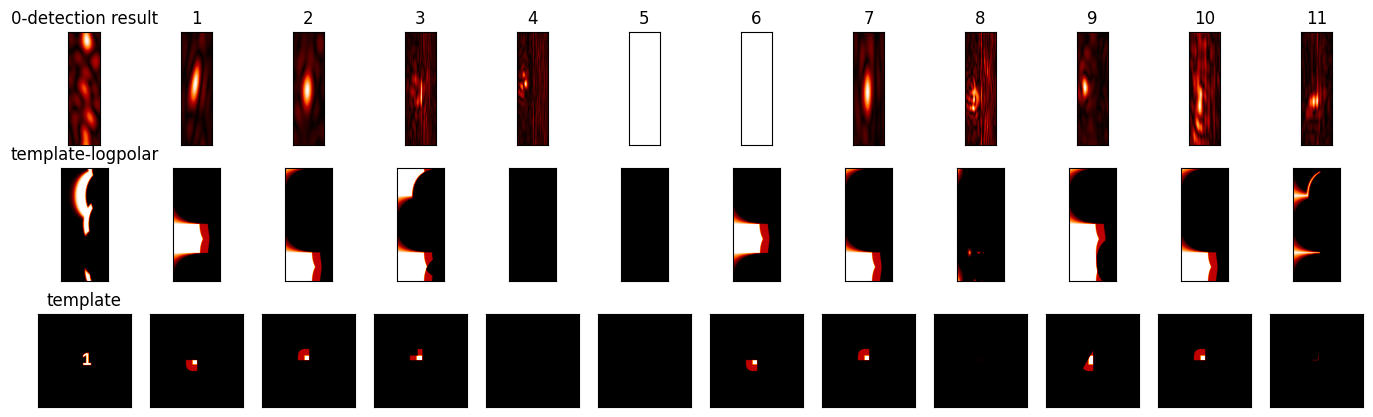

In [7]:
from ect import logpolar_new

tracker = Tracker(generator=g, matcher=m)

plt.figure(figsize=(20,5))

# inv = lambda x: ilogpolar_new(np.abs(np.fft.ifft2(x)), (400, 400), 200, Config(start_angle_deg=0, offset_value_px=0))
inv = lambda x: np.abs(np.fft.ifft2(x))

for idx, images in enumerate(tracker.track()):
    # print(idx)
    plt.subplot(3, 14, idx+1)
    if idx == 0:
        plt.title(f"{idx}-detection result")
    else:
        plt.title(str(idx))
    plt.imshow(center(images[1], inv), cmap=gist_heat)
    # plt.imshow(inv(images[0]))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 14, 29+idx)
    plt.imshow(images[2], cmap=gist_heat)
    if idx == 0:
        plt.title("template")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 14, 15+idx)
    if idx == 0:
        plt.title("template-logpolar")
    plt.imshow(logpolar_new(images[2].copy(), (200, 200), (360, 150), 200, Config(offset_value_px=0)), cmap=gist_heat)
    plt.xticks([])
    plt.yticks([])

